In [4]:
import numpy as np
import sys

# Define observation grid interval
DX = 0.5
DZ = 0.5

# Define observation distributions
xmax = 10
xmin = -xmax
ymin = xmin
ymax = xmax

zmin = xmin
zmax = xmax

x1d = np.arange( xmin, xmax+DX, DX) 
y1d = np.arange( ymin, ymax+DX, DX)
z1d = np.arange( zmin, zmax+DX, DX)

x3d, y3d, z3d = np.meshgrid( x1d, y1d, z1d )

print(z3d.shape)

(41, 41, 41)


In [8]:

# Target grid
cx = 0.1
cy = 0.1
cz = 0.1

dist3d = np.sqrt( np.square( cx - x3d) + np.square( cy - y3d ) + np.square( cz - z3d ) )



# localization scale
HLOC = 4.0 # km
VLOC =  2.0 # km

# normalized distance squared
ndist3d =  np.square( (cx - x3d)/HLOC ) \
                 + np.square( (cy - y3d)/HLOC ) \
                  + np.square( (cz - z3d)/VLOC ) 

nrloc3d = np.exp( -0.5*ndist3d )

# 1d debug
#print( x1d )
#print( np.abs( cx - x1d ) )
#print( np.floor( np.abs(x1d - cx ) / DX ) )

di = np.floor( np.abs( cx - x1d  ) / DX )
dj = np.floor( np.abs( cy - y1d  ) / DX )
dk = np.floor( np.abs( cz - z1d  ) / DZ )

di3d, dj3d, dk3d = np.meshgrid( di, dj, dk )

#print(di3d.shape)

ngrid_h = 4
ngrid_v = 4

dist_l = [1.0, 2.0, 3.0, 4.0]
dist_l = np.arange( 0.5, 6.5, 0.05)

print( dist_l.shape )
nobs_l = np.zeros( dist_l.shape)
wtot_l = np.zeros( dist_l.shape )

nobs_l_thin = np.zeros( dist_l.shape)
wtot_l_thin = np.zeros( dist_l.shape )

for i, dist in enumerate( dist_l):
    nobs = len(dist3d[ dist3d <= dist])
    wtot = np.sum( nrloc3d[ dist3d <= dist])
    
    nobs_l[i] = nobs
    wtot_l[i] = wtot

    nobs_thin = len(dist3d[ (dist3d <= dist) & \
                         ( di3d % ngrid_h == 0 ) & \
                            ( dj3d % ngrid_h == 0 ) & \
                            ( dk3d % ngrid_v == 0 ) ] )
    wtot_thin = np.sum( nrloc3d[ (dist3d <= dist) & \
                              ( di3d % ngrid_h == 0 ) & \
                              ( dj3d % ngrid_h == 0 ) & \
                             ( dk3d % ngrid_v == 0 ) ] )
    
    nobs_l_thin[i] = nobs_thin
    wtot_l_thin[i] = wtot_thin

#    print( '\n3D distance <= {0:.1f} km'.format( dist) )
#    print('[Default]   nobs: {0:0=5}, eobs:{1:.1f} '.format( nobs, w_total ) )


(120,)


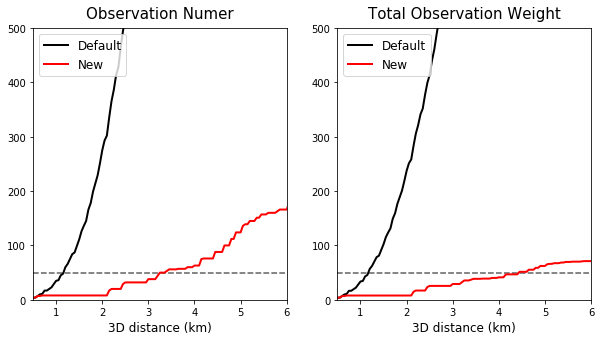

In [9]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2 )) = plt.subplots(1, 2, figsize=( 10, 5))

ymin_ = 0
ymax_ = 500

ymin2_ = 0
ymax2_ = 500


xmin_ = 0.5
xmax_ = 6.0

tit_l = ["Observation Numer", "Total Observation Weight"]

ax_l = [ ax1, ax2 ]
c_l = [ "k", "r"]
lab_l = ["Default", "New"]
data1_l = [ nobs_l, nobs_l_thin ]
data2_l = [ wtot_l, wtot_l_thin ]
for i, data in enumerate( data1_l):
    
    ax1.plot( dist_l, data1_l[i], color=c_l[i], label=lab_l[i],
        linestyle='solid', linewidth=2.0,)

    
    ax2.plot( dist_l, data2_l[i], color=c_l[i], label=lab_l[i],
        linestyle='solid', linewidth=2.0,)
    
    ax1.hlines( y=50, xmin=xmin_, xmax=xmax_, linestyle='dashed',
             colors='gray')
    ax2.hlines( y=50, xmin=xmin_, xmax=xmax_, linestyle='dashed',
             colors='gray')
    
    ax = ax_l[i]

    ax.text( 0.5, 1.08, tit_l[i],
                fontsize=15, transform=ax.transAxes,
                 horizontalalignment='center',
                 verticalalignment='top',
                  )



ax1.legend( fontsize=12, loc='upper left')
ax2.legend( fontsize=12,  loc='upper left')

#ax2.plot( wtot_l, dist_l )


ax1.set_ylim( ymin_, ymax_)
ax2.set_ylim( ymin2_, ymax2_)

ax1.set_xlim( xmin_, xmax_)
ax2.set_xlim( xmin_, xmax_)

xlab = "3D distance (km)"

ax1.set_xlabel( xlab, fontsize=12)
ax2.set_xlabel( xlab, fontsize=12)

fig.savefig("png/2p_nobs_lim.png")

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter3D( cx, cy, cz, color='r', s=200.0 ) 
#ax.scatter3D( np.ravel(x3d), np.ravel(y3d), np.ravel(z3d) ) 

xmin_ = xmin
xmax_ = xmax
ymin_ = ymin
ymax_ = ymax
zmin_ = zmin
zmax_ = zmax

ax.set_xlim( xmin_, xmax_)
ax.set_ylim( ymin_, ymax_)
ax.set_zlim( zmin_, zmax_)

dist = 2.0
xdat = np.ravel( x3d[ dist3d < dist ] )
ydat = np.ravel( y3d[ dist3d < dist ] )
zdat = np.ravel( z3d[ dist3d < dist ] )
#ax.scatter3D( xdat, ydat, zdat, )

#for dist in [1.0, 10.0]:
 #      print( dist, len(dist3d[ dist3d < dist]) )

AttributeError: 'AxesSubplot' object has no attribute 'set_zlim'